Air pollution poses a significant threat to human health and the environment, with PM2.5 (particulate matter with a diameter of 2.5 micrometers or smaller) being one of the most critical pollutants due to its ability to penetrate deep into the lungs and bloodstream.

**In this study, I aim to leverage data provided by the Environmental Protection Sub-department of Hanoi to build regression models that accurately predict PM2.5 levels.** 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

In [28]:
df_1 = pd.read_excel('72. Hà Nội_ Chi cục BVMT (KK)_20210906_100737.xlsx')
df_2 = pd.read_excel('72. Hà Nội_ Chi cục BVMT (KK)_20211111_160610.xlsx')
df_3 = pd.read_excel('72. Hà Nội_ Chi cục BVMT (KK)_20220321_085841.xlsx')

To facilitate data understanding and processing, I combine 3 data files into 1 dataframe

In [29]:
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Datetime           15072 non-null  object 
 1   NHIệT độ           15072 non-null  object 
 2   NOX                15072 non-null  float64
 3   SO2                15072 non-null  object 
 4   O3                 15072 non-null  float64
 5   PM-10              15072 non-null  object 
 6   PM-2-5             15072 non-null  object 
 7   NO                 15072 non-null  float64
 8   NO2                15072 non-null  float64
 9   CO                 15072 non-null  object 
 10  ÁP SUấT KHí QUYểN  15072 non-null  object 
 11  RADIATION          15072 non-null  object 
 12  RH                 15072 non-null  object 
 13  HướNG GIó          15072 non-null  object 
 14  TốC độ GIó         15072 non-null  object 
 15  LượNG MưA          15072 non-null  object 
dtypes: float64(4), object(

(           Datetime NHIệT độ    NOX   SO2    O3  PM-10 PM-2-5     NO    NO2  \
 0  21:00 25/02/2020     22.2  48.80  6.43  7.08  76.14  50.19  10.25  33.14   
 1  22:00 25/02/2020     21.5  63.05  6.25  4.16  75.28  47.97  16.26  38.20   
 2  23:00 25/02/2020     21.3  62.61  5.55  3.36  72.97  51.11  16.93  36.75   
 3  00:00 26/02/2020     21.2  61.86  6.68  4.76  77.43  53.45  16.80  36.18   
 4  01:00 26/02/2020       21  84.88  5.39  1.54  69.16  52.04  27.21  43.30   
 
        CO ÁP SUấT KHí QUYểN RADIATION    RH HướNG GIó TốC độ GIó LượNG MưA  
 0   998.1            1013.4       7.4  69.1       150        2.4         0  
 1   791.8            1013.6       6.9  72.7       151        1.7         0  
 2     894            1013.5       6.4  71.6       148        1.9         0  
 3  1117.9            1013.4       6.7  70.4       149          2         0  
 4   652.8            1013.2       6.6  73.3       149        1.8         0  ,
 None)

Convert datatype to float

In [30]:
columns = [
    "NHIệT độ", "SO2", "PM-10", "PM-2-5", "CO", 
    "ÁP SUấT KHí QUYểN", "RADIATION", "RH", 
    "HướNG GIó", "TốC độ GIó", "LượNG MưA"
]

for col in df[columns]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')


C:\Users\tranl\AppData\Local\Temp\ipykernel_2744\135538639.py:10: UserWarning: Parsing dates in %H:%M %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')


In [31]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datetime           15072 non-null  datetime64[ns]
 1   NHIệT độ           15067 non-null  float64       
 2   NOX                15072 non-null  float64       
 3   SO2                15070 non-null  float64       
 4   O3                 15072 non-null  float64       
 5   PM-10              15065 non-null  float64       
 6   PM-2-5             15059 non-null  float64       
 7   NO                 15072 non-null  float64       
 8   NO2                15072 non-null  float64       
 9   CO                 15070 non-null  float64       
 10  ÁP SUấT KHí QUYểN  13730 non-null  float64       
 11  RADIATION          13730 non-null  float64       
 12  RH                 13730 non-null  float64       
 13  HướNG GIó          13730 non-null  float64       
 14  TốC độ

(             Datetime  NHIệT độ    NOX   SO2    O3  PM-10  PM-2-5     NO  \
 0 2020-02-25 21:00:00      22.2  48.80  6.43  7.08  76.14   50.19  10.25   
 1 2020-02-25 22:00:00      21.5  63.05  6.25  4.16  75.28   47.97  16.26   
 2 2020-02-25 23:00:00      21.3  62.61  5.55  3.36  72.97   51.11  16.93   
 3 2020-02-26 00:00:00      21.2  61.86  6.68  4.76  77.43   53.45  16.80   
 4 2020-02-26 01:00:00      21.0  84.88  5.39  1.54  69.16   52.04  27.21   
 
      NO2      CO  ÁP SUấT KHí QUYểN  RADIATION    RH  HướNG GIó  TốC độ GIó  \
 0  33.14   998.1             1013.4        7.4  69.1      150.0         2.4   
 1  38.20   791.8             1013.6        6.9  72.7      151.0         1.7   
 2  36.75   894.0             1013.5        6.4  71.6      148.0         1.9   
 3  36.18  1117.9             1013.4        6.7  70.4      149.0         2.0   
 4  43.30   652.8             1013.2        6.6  73.3      149.0         1.8   
 
    LượNG MưA  
 0        0.0  
 1        0.0  
 2    

Missing values can skew the result of regression model or lead to errors during training. So that, handling them ensures the data is complete and reliable for analysis

**Because the large of the dataset, so I decide to drop all row of missing values**

In [32]:
df.isnull().sum()

Datetime                0
NHIệT độ                5
NOX                     0
SO2                     2
O3                      0
PM-10                   7
PM-2-5                 13
NO                      0
NO2                     0
CO                      2
ÁP SUấT KHí QUYểN    1342
RADIATION            1342
RH                   1342
HướNG GIó            1342
TốC độ GIó           1342
LượNG MưA            1342
dtype: int64

In [33]:
df = df.dropna(axis=0)
df.head(), df.isnull().sum()

(             Datetime  NHIệT độ    NOX   SO2    O3  PM-10  PM-2-5     NO  \
 0 2020-02-25 21:00:00      22.2  48.80  6.43  7.08  76.14   50.19  10.25   
 1 2020-02-25 22:00:00      21.5  63.05  6.25  4.16  75.28   47.97  16.26   
 2 2020-02-25 23:00:00      21.3  62.61  5.55  3.36  72.97   51.11  16.93   
 3 2020-02-26 00:00:00      21.2  61.86  6.68  4.76  77.43   53.45  16.80   
 4 2020-02-26 01:00:00      21.0  84.88  5.39  1.54  69.16   52.04  27.21   
 
      NO2      CO  ÁP SUấT KHí QUYểN  RADIATION    RH  HướNG GIó  TốC độ GIó  \
 0  33.14   998.1             1013.4        7.4  69.1      150.0         2.4   
 1  38.20   791.8             1013.6        6.9  72.7      151.0         1.7   
 2  36.75   894.0             1013.5        6.4  71.6      148.0         1.9   
 3  36.18  1117.9             1013.4        6.7  70.4      149.0         2.0   
 4  43.30   652.8             1013.2        6.6  73.3      149.0         1.8   
 
    LượNG MưA  
 0        0.0  
 1        0.0  
 2    

Overview of the dataset

In [34]:
df.describe().round(2)

Datetime  NHIệT độ       NOX       SO2        O3  \
count                          13720  13720.00  13720.00  13720.00  13720.00   
mean   2021-01-18 10:01:51.450437120     23.73     32.69      1.53      8.00   
min              2020-02-25 21:00:00      0.00      0.00      0.00      0.00   
25%              2020-08-05 18:45:00     20.00     15.60      0.00      0.00   
50%              2020-12-30 01:30:00     24.50     28.36      1.70      2.50   
75%              2021-08-03 10:15:00     28.70     42.29      2.58     11.75   
max              2021-12-31 23:00:00     40.60    683.78     18.10    231.19   
std                              NaN      7.55     26.53      1.29     12.39   

          PM-10    PM-2-5        NO       NO2        CO  ÁP SUấT KHí QUYểN  \
count  13720.00  13720.00  13720.00  13720.00  13720.00           13720.00   
mean      62.48     37.37      6.50     22.82    894.05             960.05   
min        0.00      0.00     -7.27     -2.06      0.00               0.00   
25%       33.66     20.33      1.10     11.15    481.90            1002.00   
50%       52.47     32.40      5.54     19.67    763.75            1007.50   
75%       79.28     48.56      6.79     30.92   1144.53            1013.70   
max      393.56    529.55    378.60    246.25   9946.10            1028.60   
std       45.25     28.37     10.23     16.99    660.85             215.20   

       RADIATION        RH  HướNG GIó  TốC độ GIó  LượNG MưA  
count   13720.00  13720.00   13720.00    13720.00   13720.00  
mean      141.23     61.56     143.20        1.37       0.12  
min         0.00      0.00       0.00        0.00       0.00  
25%         6.90     53.40      52.00        0.90       0.00  
50%         8.90     65.70     143.00        1.30       0.00  
75%       191.82     75.30     180.00        1.80       0.00  
max      1030.70     93.70     360.00        5.60      42.72  
std       223.72     18.93     100.61        0.74       1.15

PM2.5 is my target variable, and understanding its distribution is essential.

**Visualizing the distribution of PM2.5 can check if it’s skewed or normally distributed.**

Original Skewness: 1.9347015805407073


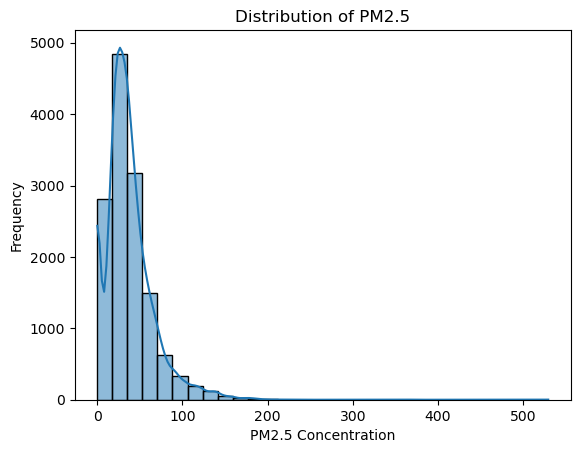

In [35]:
original_skewness = skew(df['PM-2-5'])
print(f"Original Skewness: {original_skewness}")

sns.histplot(df['PM-2-5'], kde=True, bins=30)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()

Based on the distribution figure i can evaluate that the distribution of PM2.5 is skewed. Specifically, it is right-skewed (positively skewed) because:

- The peak of the distribution is concentrated on the lower end of the PM2.5 values.
- There is a long tail extending towards higher PM2.5 values.

**To address the right-skewed distribution, I apply Square Root Transformation to make the data more symmetric and closer to a normal distribution.**

Square Root-Transformed Skewness: -0.349347528823149


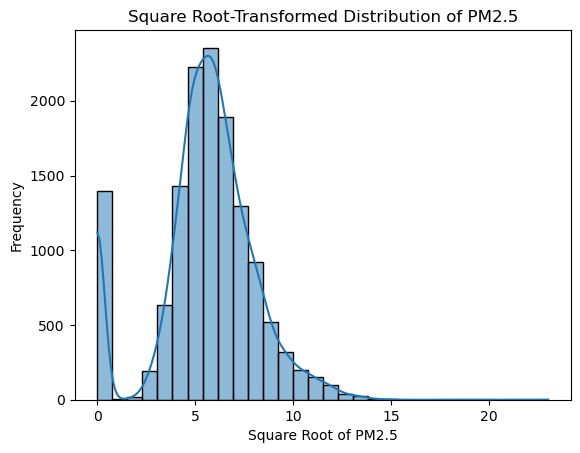

In [36]:
df['PM-2.5_sqrt'] = np.sqrt(df['PM-2-5'])

sqrt_skewness = skew(df['PM-2.5_sqrt'])
print(f"Square Root-Transformed Skewness: {sqrt_skewness}")

sns.histplot(df['PM-2.5_sqrt'], kde=True, bins=30)
plt.title('Square Root-Transformed Distribution of PM2.5')
plt.xlabel('Square Root of PM2.5')
plt.ylabel('Frequency')
plt.show()

A correlation heatmap identifies relationships between numerical features, helping me understand which variables are strongly associated with PM2.5.

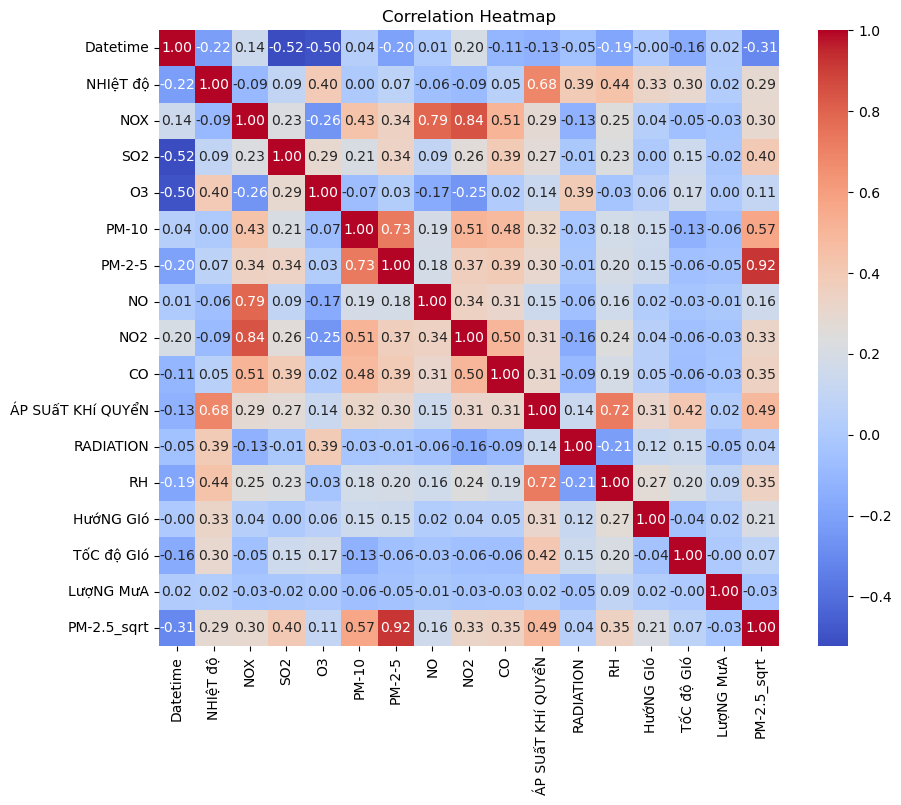

In [37]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Based on the heatmap figure i can select features which is the relatest to PM2.5 such as:
- Nox
- SO2
- PM10
- NO2
- CO
- ÁP SUấT KHí QUYểN
- Rh

Beside that temperature also has a close relationship in reality, so I will select temperature as well.

After important features selected, i detect and handle outlier values of each features to improving performance when building models.

In [47]:
def detect_outliers_iqr(df, columns):
    outlier_counts = {}
    outlier_indices = set()

    for column in columns:
        Q1 = np.percentile(df[column].dropna(), 25)
        Q3 = np.percentile(df[column].dropna(), 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
        outlier_indices.update(outliers.index)

    return outlier_counts, outlier_indices

columns_to_check = ['NHIệT độ', 'NOX', 'SO2', 'PM-10', 'NO2', 'CO', 'ÁP SUấT KHí QUYểN', 'RH']

outlier_counts, outlier_indices = detect_outliers_iqr(df, columns_to_check)

print(outlier_counts)

{'NHIệT độ': 654, 'NOX': 540, 'SO2': 5, 'PM-10': 817, 'NO2': 414, 'CO': 598, 'ÁP SUấT KHí QUYểN': 662, 'RH': 659}


Because Data is so large, so i remove all outlier values.

In [48]:
df = df.drop(index=outlier_indices).reset_index(drop=True)

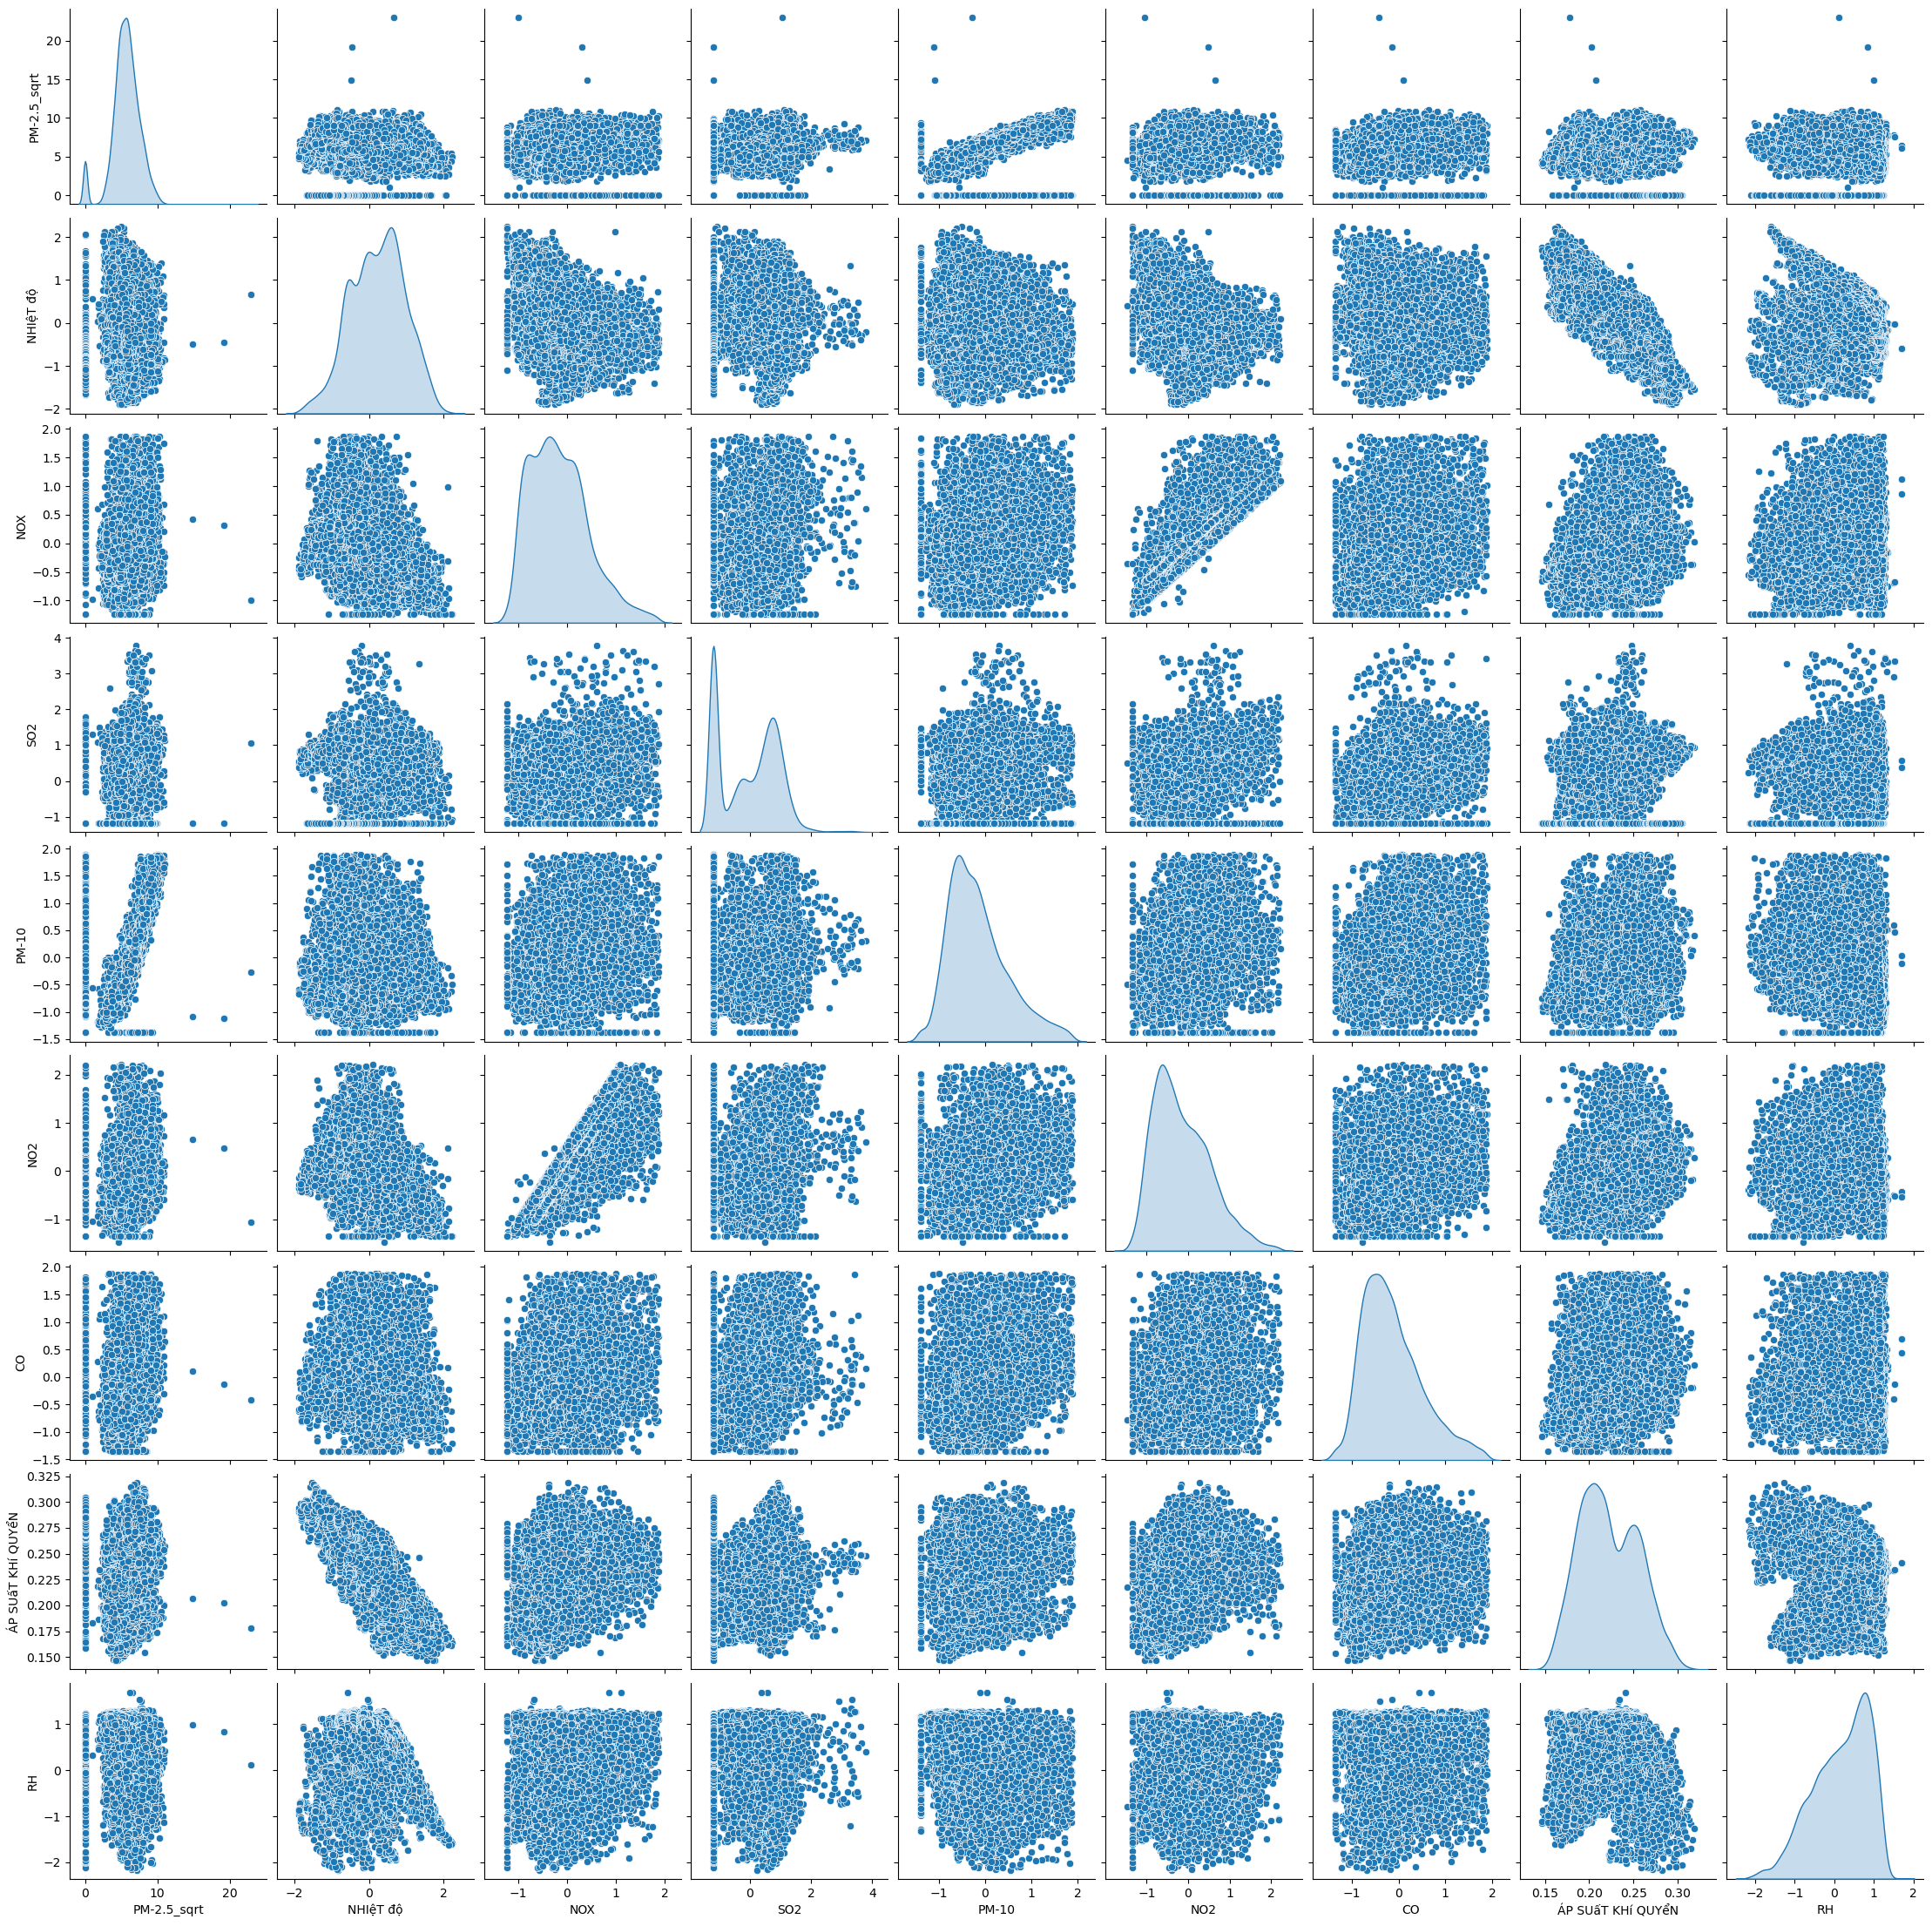

In [49]:
sns.pairplot(df, vars=['PM-2.5_sqrt', 'NHIệT độ', 'NOX', 'SO2', 'PM-10', 'NO2', 'CO', 'ÁP SUấT KHí QUYểN', 'RH'], diag_kind='kde')
plt.show()

Pair plots show how PM2.5 relates to other features 

Standardizing or normalizing these features which have vastly different scales, ensures that the regression model treats all inputs equally, avoiding bias towards larger-scale features.

In [50]:
scale = StandardScaler()

features_to_scale = ['NHIệT độ', 'NOX', 'SO2', 'PM-10', 'NO2', 'CO', 'ÁP SUấT KHí QUYểN', 'RH']

df[features_to_scale] = scale.fit_transform(df[features_to_scale])

df[features_to_scale].head()

NHIệT độ       NOX       SO2     PM-10       NO2        CO  \
0 -0.589464  1.259859  4.066077  0.697464  1.109616  0.455319   
1 -0.716946  2.149761  3.917423  0.667907  1.549174 -0.036534   
2 -0.753370  2.122284  3.339323  0.588515  1.423214  0.207127   
3 -0.826217  3.349412  2.926395  0.840094  1.970490 -0.775864   
4 -0.953699  2.679331  3.562304  0.533869  0.837716  1.825022   

   ÁP SUấT KHí QUYểN        RH  
0           0.780791  0.337584  
1           0.809201  0.607673  
2           0.794996  0.525146  
3           0.723971  0.735215  
4           0.979662  0.885265

In [51]:
from sklearn.model_selection import train_test_split

X = df[features_to_scale]
y = df['PM-2.5_sqrt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 9128, Testing samples: 2283


I'll start by testing 7 models and compare their Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score.

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

stacking_model = StackingRegressor(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('rf', rf_model)],
    final_estimator=LinearRegression()
)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model,
    "Stacking Model": stacking_model
}

In [53]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

results = {name: evaluate_model(model, X_train, X_test, y_train, y_test) for name, model in models.items()}

results_df = pd.DataFrame(results).T
print(results_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 9128, number of used features: 8
[LightGBM] [Info] Start training from score 5.624751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

This result show that Stacking Model is the best because "MAE", "MSE", "RMSE" are lowest and R2 score is highest. Hence, i start to fine-tune this model with hyperparameter tuning.

In [54]:
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9]
}

lgbm_params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50]
}

rf_params = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20]
}

xgb_search = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=3, scoring='r2', n_jobs=-1)
lgbm_search = GridSearchCV(LGBMRegressor(random_state=42), lgbm_params, cv=3, scoring='r2', n_jobs=-1)
rf_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2', n_jobs=-1)

xgb_search.fit(X_train, y_train)
lgbm_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)

xgb_best = xgb_search.best_estimator_
lgbm_best = lgbm_search.best_estimator_
rf_best = rf_search.best_estimator_

print("Best XGBoost Params:", xgb_search.best_params_)
print("Best LightGBM Params:", lgbm_search.best_params_)
print("Best Random Forest Params:", rf_search.best_params_)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 9128, number of used features: 8
[LightGBM] [Info] Start training from score 5.624751
Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
Best LightGBM Params: {'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 50}
Best Random Forest Params: {'max_depth': 20, 'n_estimators': 100}


In [55]:
base_models = [
    ('XGBoost', xgb_best),
    ('LightGBM', lgbm_best),
    ('RandomForest', rf_best)
]

stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_stacking)
mse = mean_squared_error(y_test, y_pred_stacking)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_stacking)

print(f"Stacking Model Performance:\n MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 9128, number of used features: 8
[LightGBM] [Info] Start training from score 5.624751
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 7302, number of used features: 8
[LightGBM] [Info] Start training from score 5.608881
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testin

Now, after re-train Stacking model with hyperparameter, i conducted performance evaluation by visualizing.

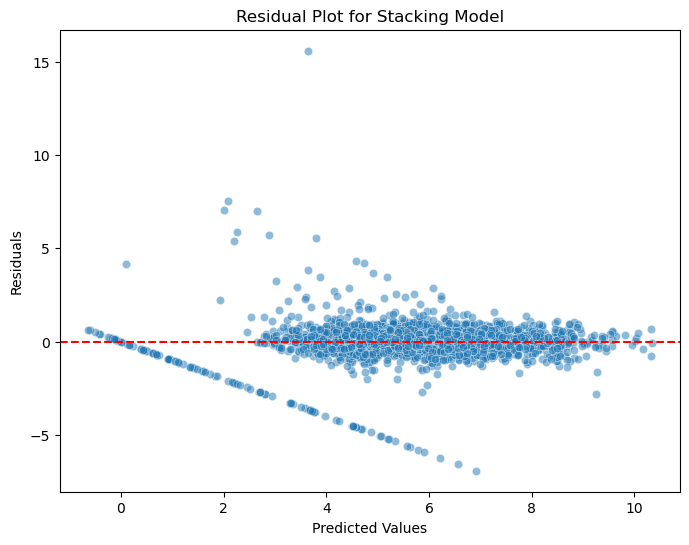

In [56]:
residuals = y_test - y_pred_stacking

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_stacking, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Stacking Model")
plt.show()

First, i use a residual plot to shows the difference between actual and predicted values. The residuals are randomly scattered around zero so that the model performs well.

Next, i evaluate how close the predictions are to actual values by making a perfect prediction line.

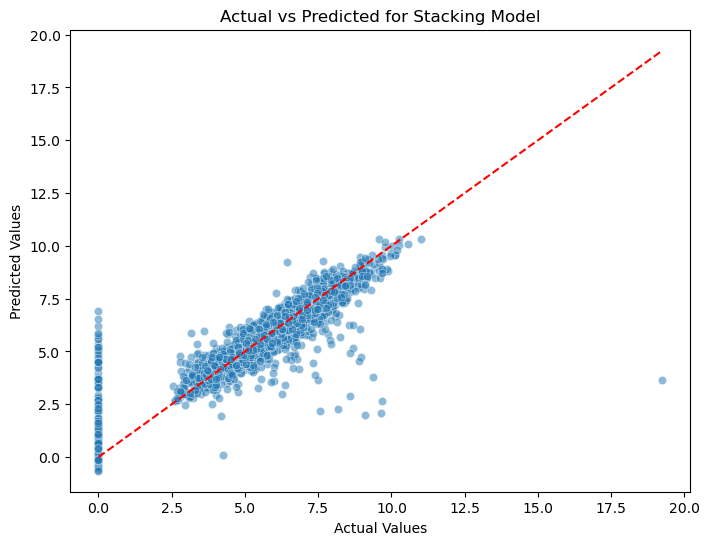

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_stacking, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted for Stacking Model")
plt.show()

C:\Users\tranl\AppData\Local\Temp\ipykernel_2744\980064781.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=rmse_values, palette="viridis")


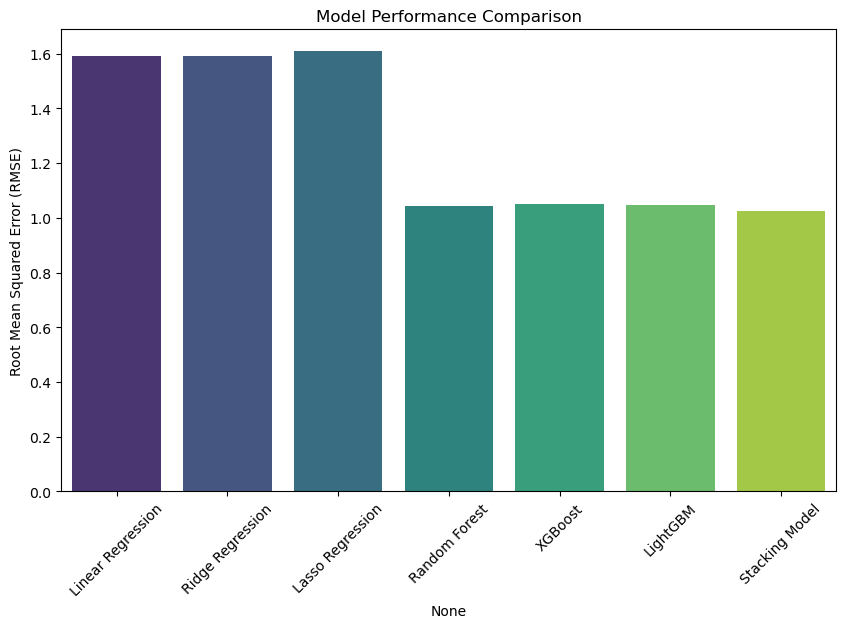

In [58]:
rmse_values = [results_df.loc[m, "RMSE"] for m in results_df.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=rmse_values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Model Performance Comparison")
plt.show()

C:\Users\tranl\AppData\Local\Temp\ipykernel_2744\215028601.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="magma")


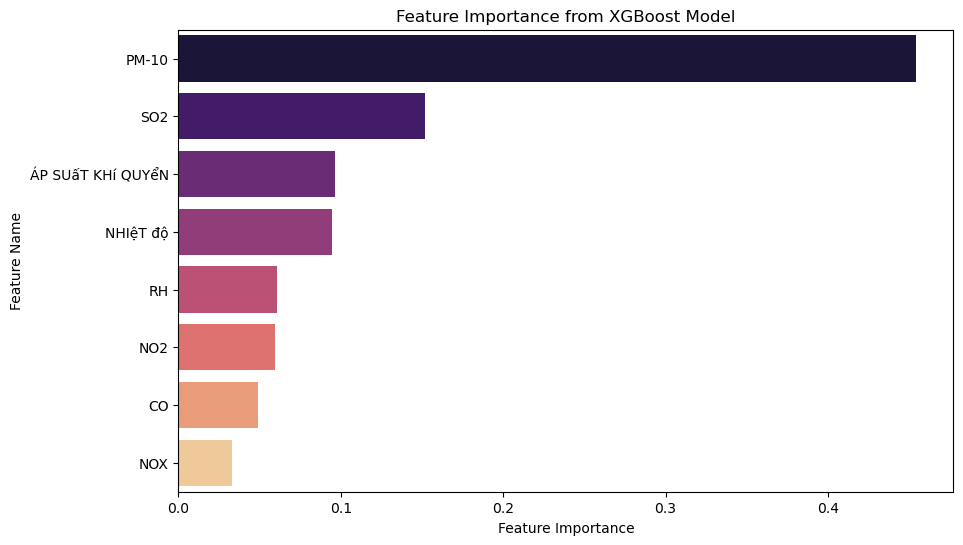

In [60]:
importances = xgb_best.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="magma")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance from XGBoost Model")
plt.show()

Finally, i use a barplot to understand which features contribute the most. Based on this figure, PM-10 is the most important feature for building models to predict PM-2.5.